## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Dimension Diabetes est : ==> ",df.shape)

Dimension Diabetes est : ==>  (768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

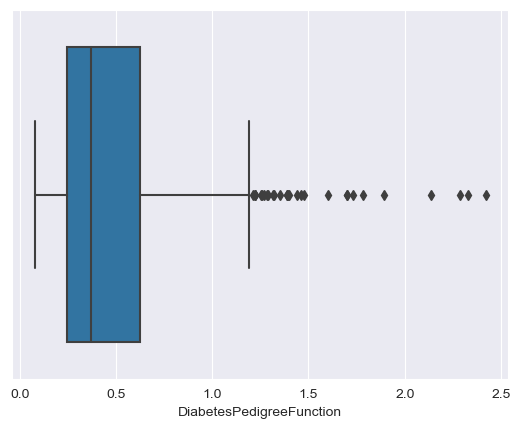

In [9]:
sns.boxplot(data=df, x="DiabetesPedigreeFunction")

<AxesSubplot:xlabel='Insulin'>

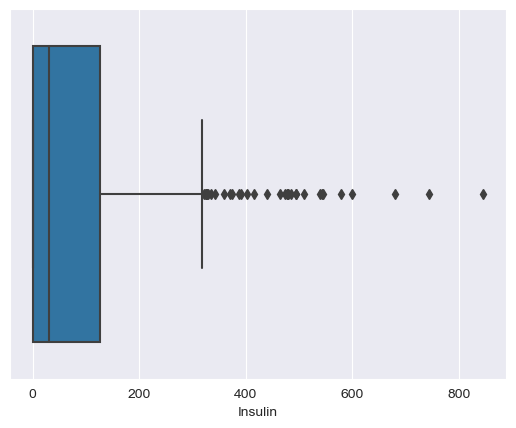

In [10]:
sns.boxplot(data=df, x="Insulin")

<AxesSubplot:xlabel='Glucose'>

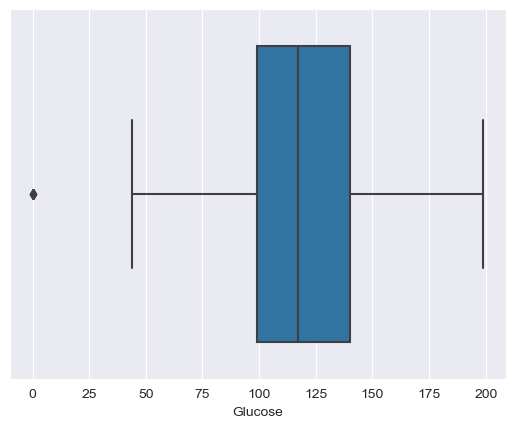

In [11]:
sns.boxplot(data=df, x="Glucose")

<AxesSubplot:xlabel='Pregnancies'>

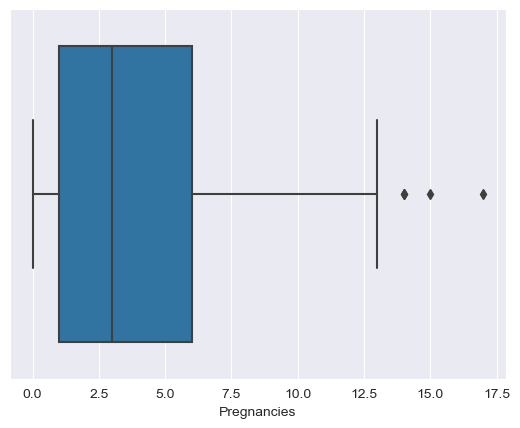

In [12]:
sns.boxplot(data=df, x="Pregnancies")

<AxesSubplot:xlabel='BloodPressure'>

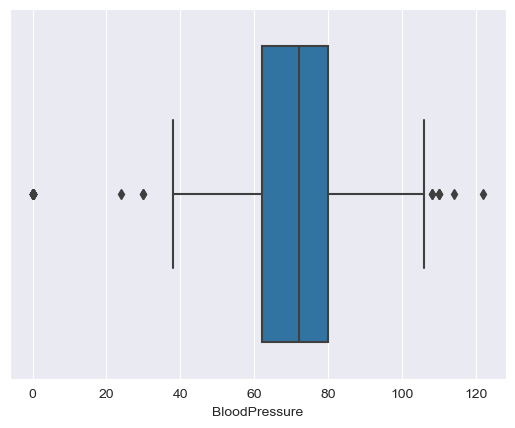

In [13]:
sns.boxplot(data=df, x="BloodPressure")

<AxesSubplot:xlabel='BMI'>

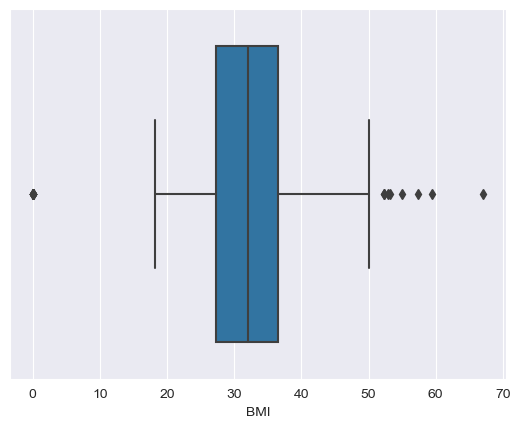

In [14]:
sns.boxplot(data=df, x="BMI")

In [15]:

for i in df[df['BloodPressure']==0]['BloodPressure'].index:
    df['BloodPressure'][i]=df['BloodPressure'].mean()
for i in df[df['SkinThickness']==0]['SkinThickness'].index:
    df['SkinThickness'][i]=df['SkinThickness'].mean()
for i in df[df['Insulin']==0]['Insulin'].index:
    df['Insulin'][i]=df['Insulin'].mean()
for i in df[df['BMI']==0]['BMI'].index:
    df['BMI'][i]=df['BMI'].mean()


In [16]:
df.iloc[7]

Pregnancies                  10.000000
Glucose                     115.000000
BloodPressure                69.105469
SkinThickness                20.589974
Insulin                      80.215914
BMI                          35.300000
DiabetesPedigreeFunction      0.134000
Age                          29.000000
Outcome                       0.000000
Name: 7, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

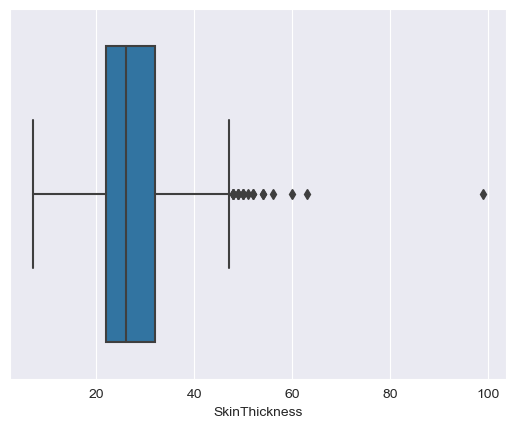

In [17]:
sns.boxplot(data=df, x="SkinThickness")

In [18]:
for i in df[df['Glucose']<2]['Glucose'].index:
    df['Glucose'][i]=df['Glucose'].mean()
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.683657,72.325527,27.593560,129.823960,32.453800,0.471876,33.240885,0.348958
std,3.369578,30.435978,12.103470,9.182155,89.597861,6.875237,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,87.837043,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,26.000000,106.055607,32.264327,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,129.360248,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128804       0.190368       0.036404   
Glucose                      0.128804  1.000000       0.243951       0.155734   
BloodPressure                0.190368  0.243951       1.000000       0.162324   
SkinThickness                0.036404  0.155734       0.162324       1.000000   
Insulin                      0.048758  0.428437       0.062615       0.305157   
BMI                          0.000659  0.225452       0.288551       0.546032   
DiabetesPedigreeFunction    -0.043242  0.090325       0.011032       0.085032   
Age                          0.607216  0.281417       0.369159       0.114324   
Outcome                      0.198689  0.481691       0.169744       0.186230   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.048758  0.000659                 -0.043242   
Glucose                   0.428437  0.225

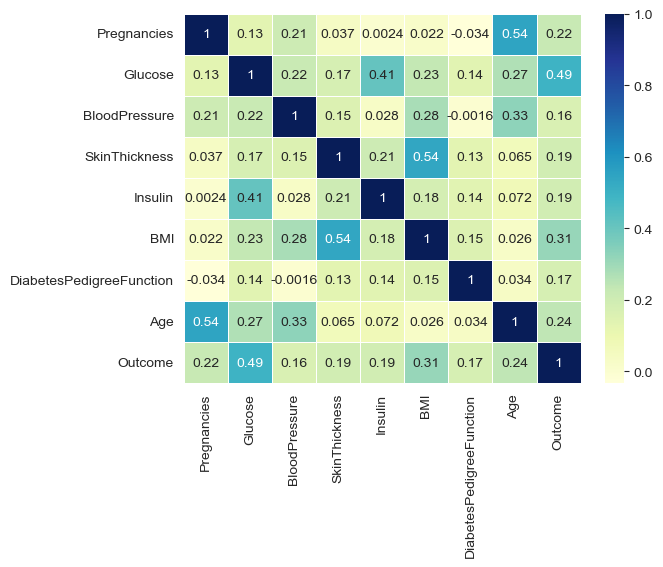

In [19]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="YlGnBu",
            annot=True,
            linewidth=0.5)
spearman_correlation=df.corr(method='spearman')
print(spearman_correlation)
kendall_correlation=df.corr(method='kendall')
print(kendall_correlation)

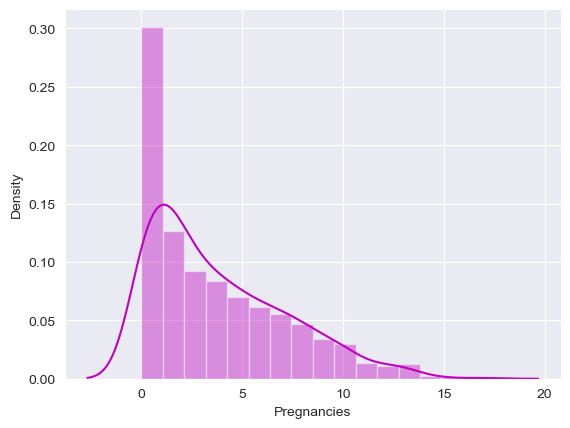

In [20]:
plot00=sns.distplot(df['Pregnancies'],color='m')

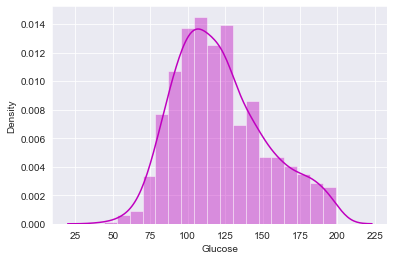

In [20]:
plot00=sns.distplot(df['Glucose'],color='m')

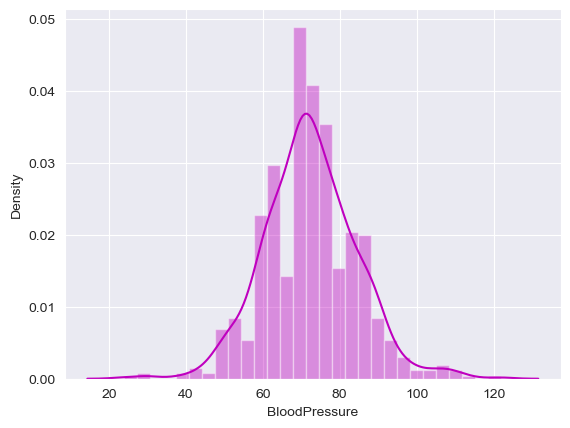

In [21]:
plot00=sns.distplot(df['BloodPressure'],color='m')

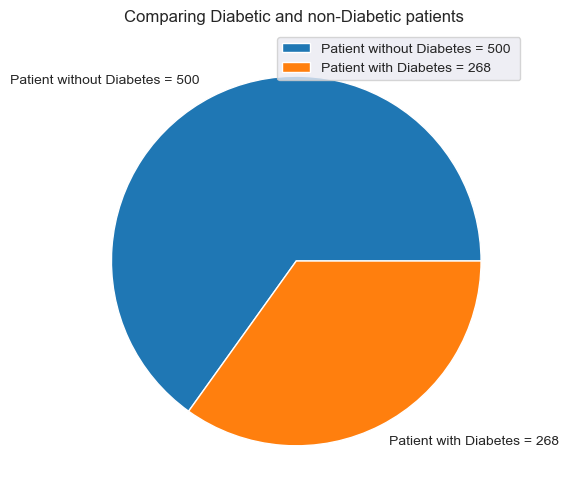

In [22]:
diabetes_count = np.array(df['Outcome'].value_counts(sort=True))
labels = ['Patient without Diabetes = 500 ', 'Patient with Diabetes = 268']
plt.figure(figsize=(8,6))
plt.pie(diabetes_count, labels=labels)
plt.legend()
plt.title('Comparing Diabetic and non-Diabetic patients ')
plt.show()

In [34]:
class_1=df[df['Outcome']==0]
class_2=df[df['Outcome']==1]

class_2_upsampled=resample(class_2,replace=True,n_samples=len(class_1),random_state=27)

upsampled=pd.concat([class_1,class_2_upsampled])
upsampled['Outcome'].value_counts()
data=upsampled


<AxesSubplot:xlabel='Outcome', ylabel='count'>

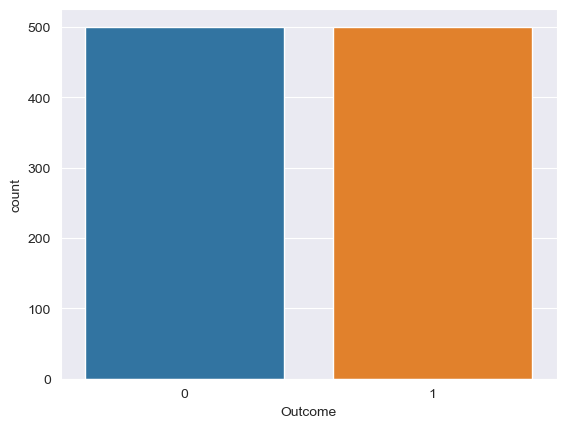

In [39]:
sns.countplot(data=data, x="Outcome")

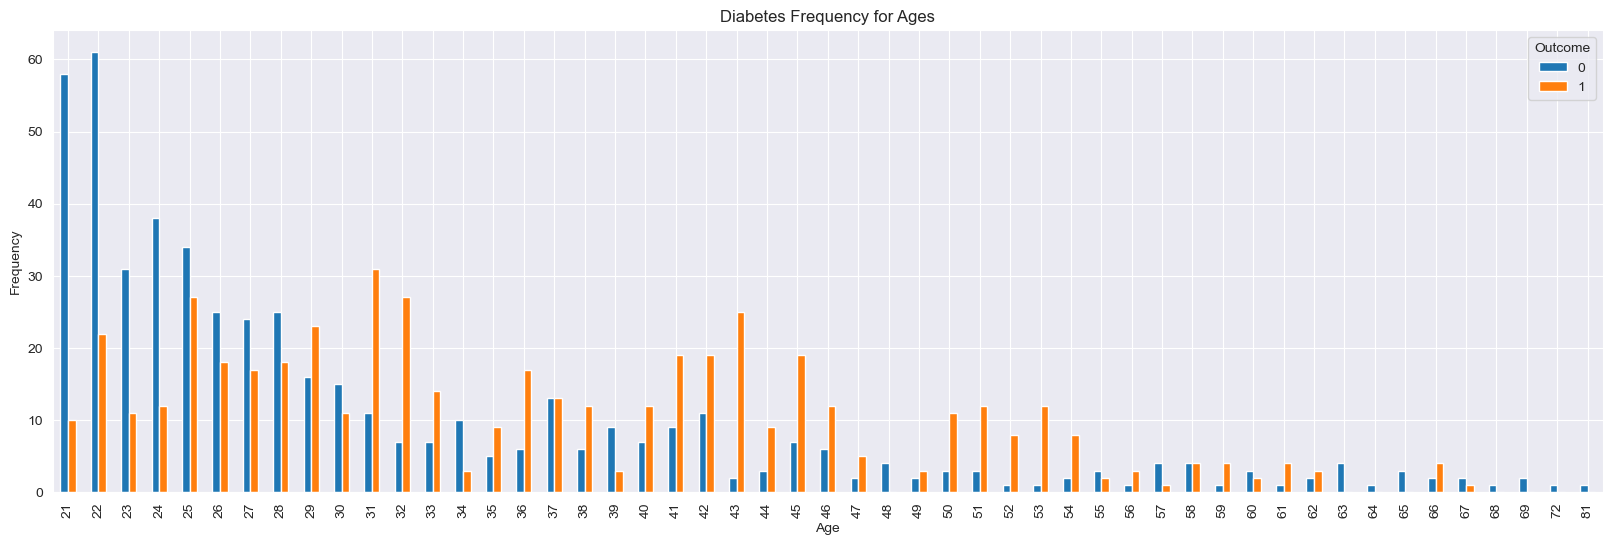

In [40]:

pd.crosstab(data.Age,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

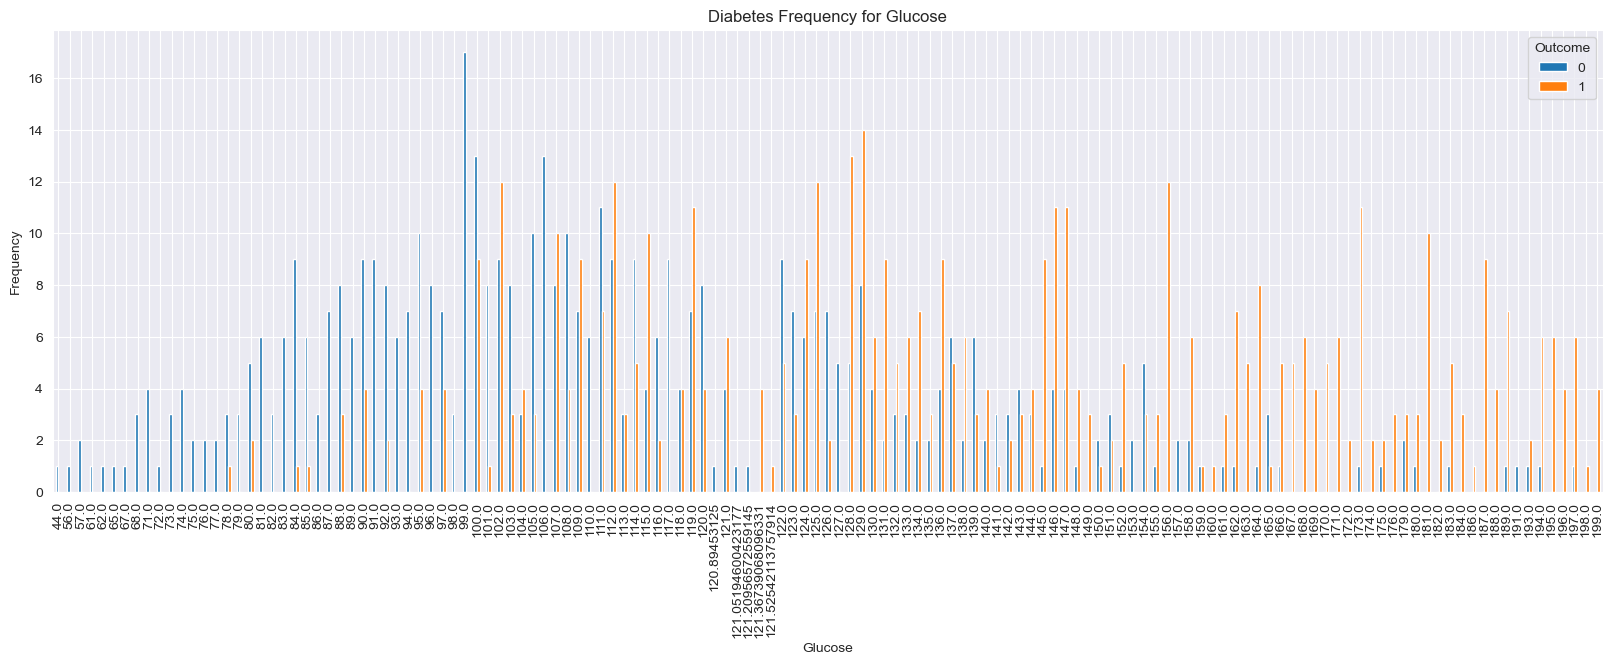

In [41]:
pd.crosstab(data.Glucose,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

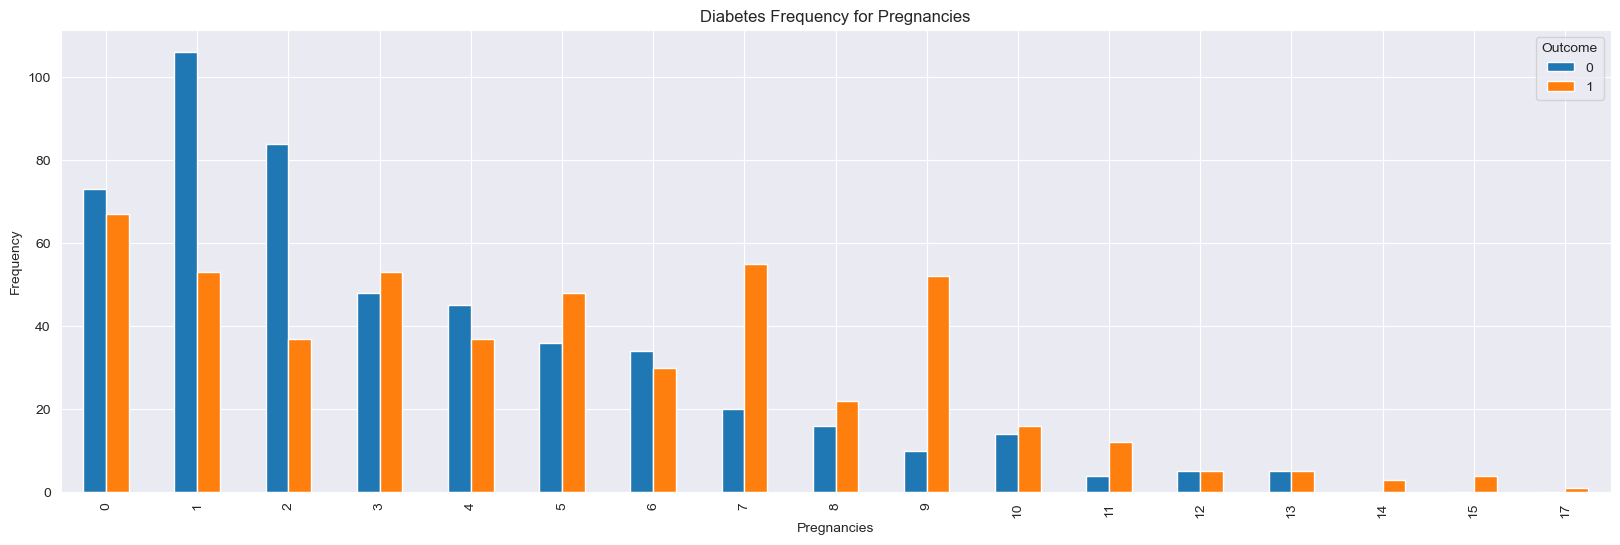

In [42]:
pd.crosstab(data.Pregnancies,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

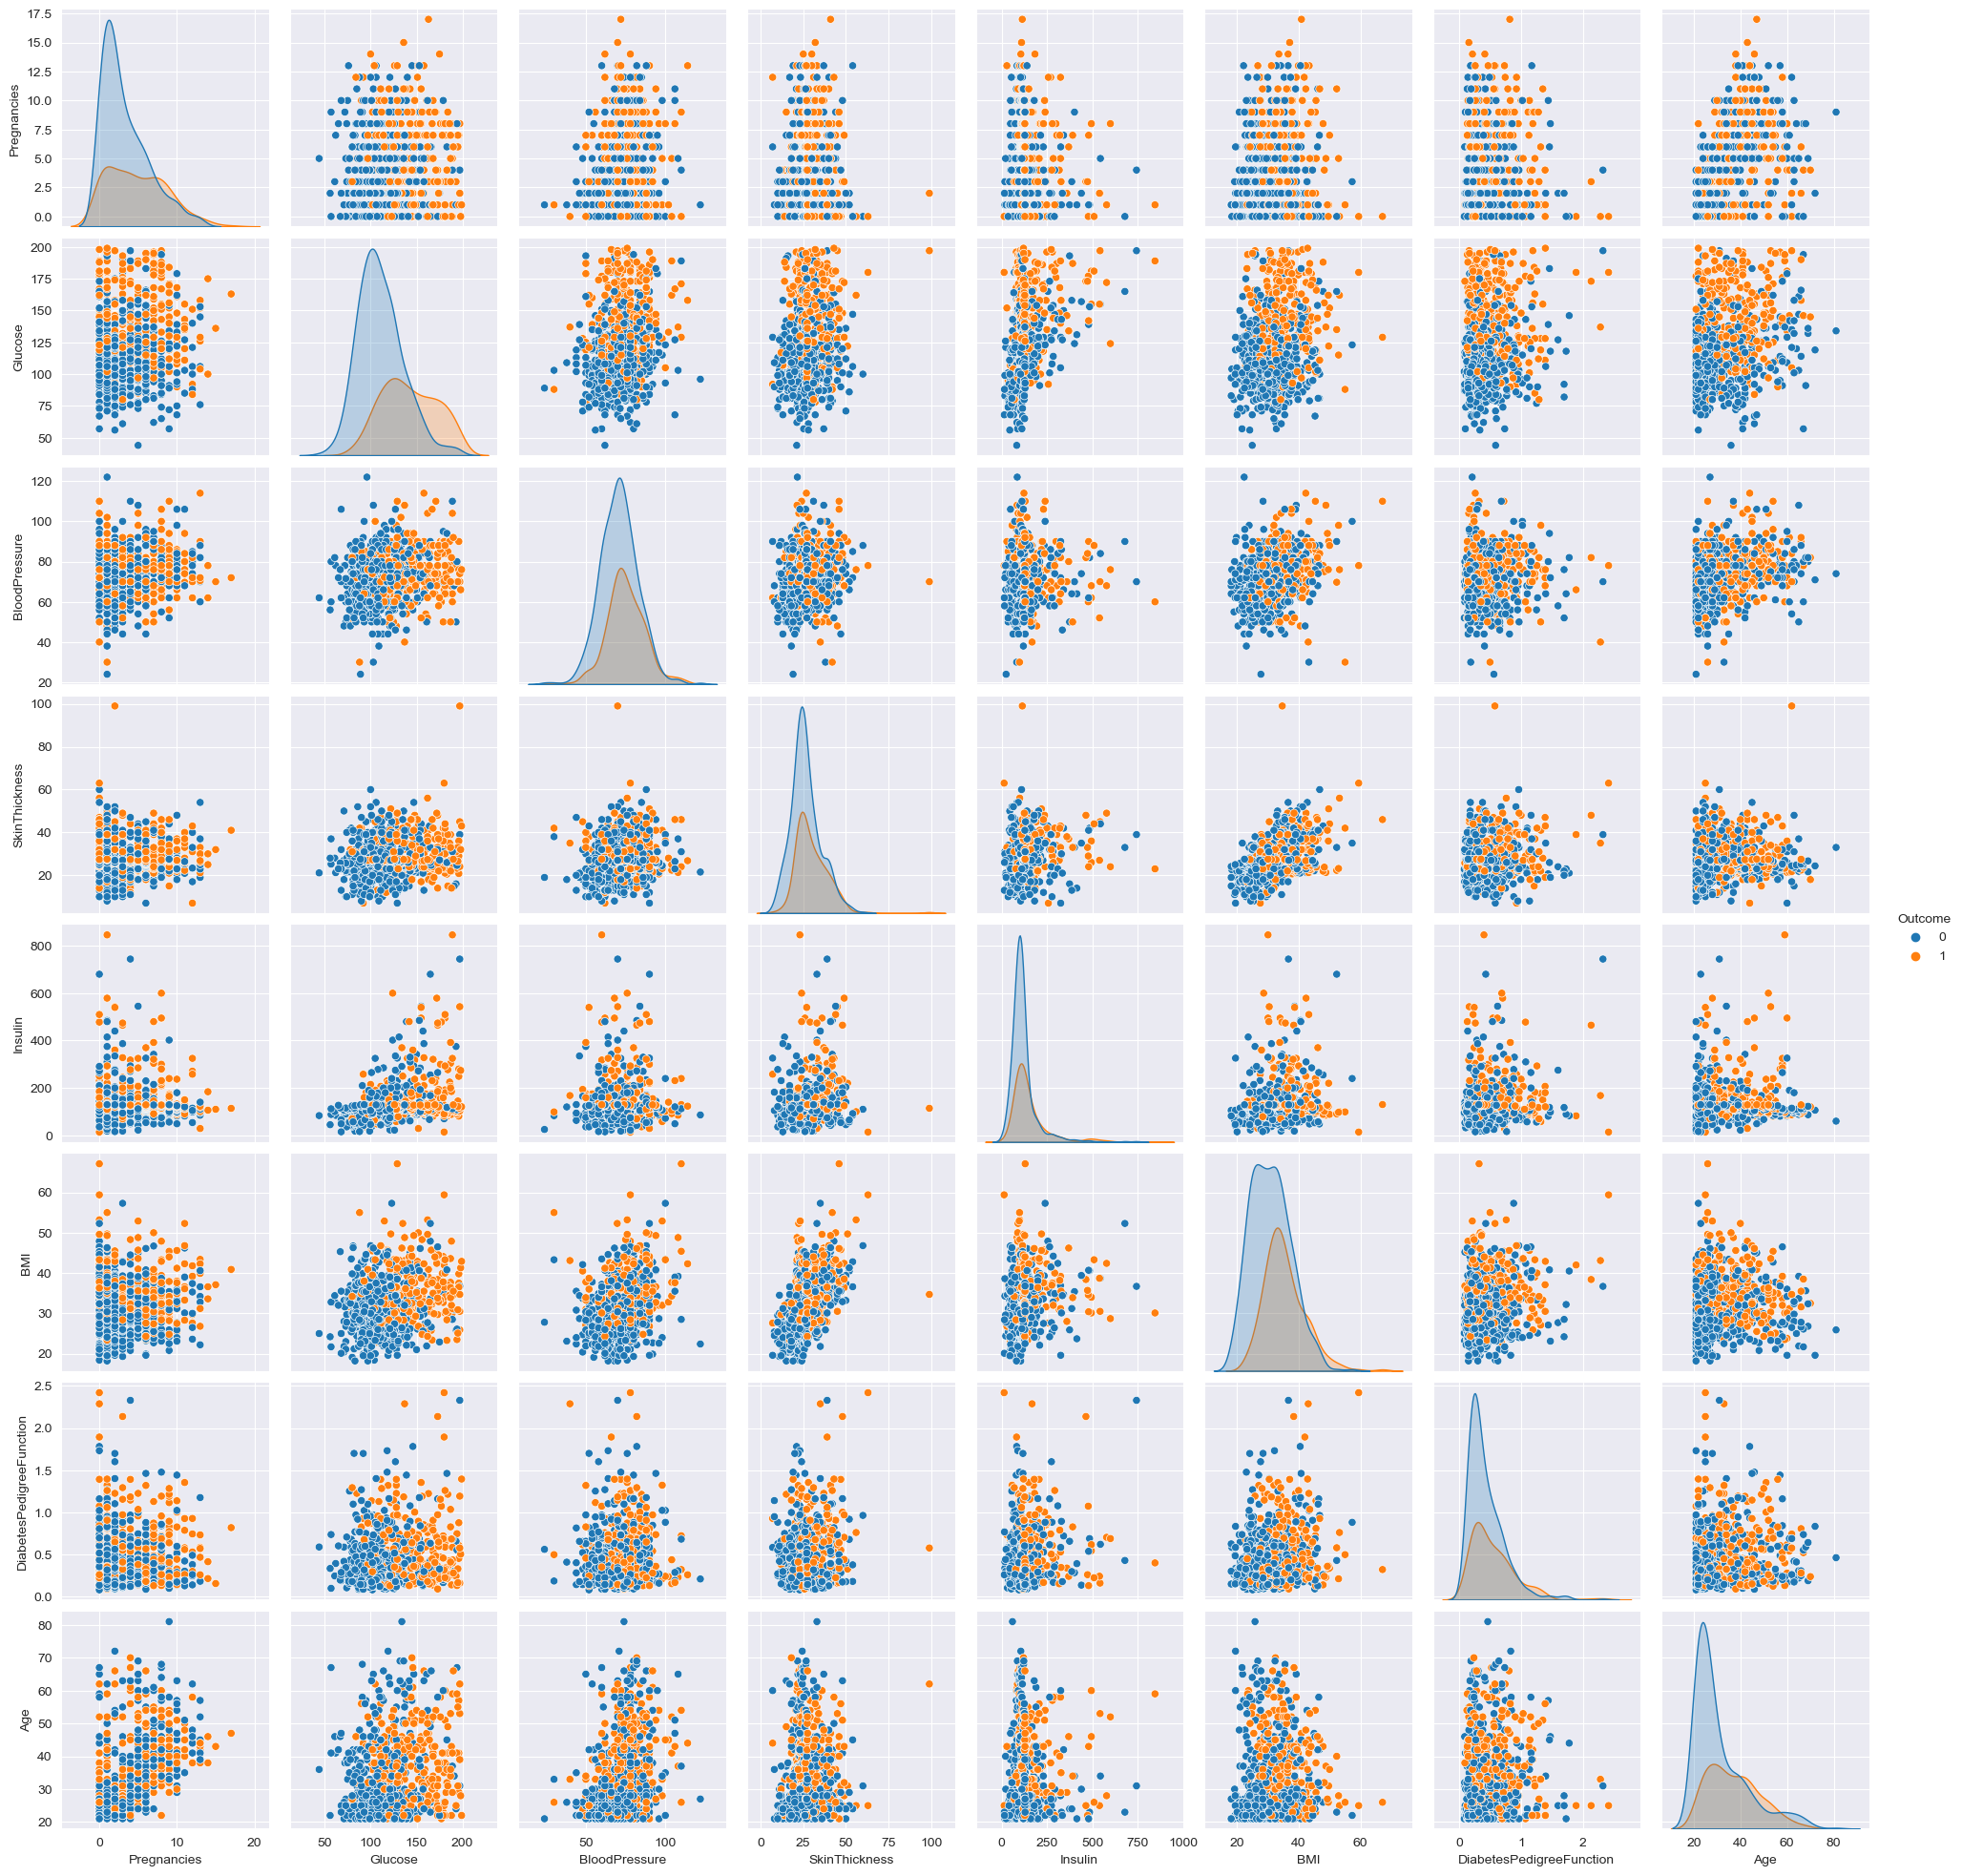

In [43]:
sns.pairplot(df, hue = 'Outcome')

In [44]:
scale = StandardScaler()

In [45]:

x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

## KNN

In [46]:

classifier= KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#Fit the model for the data

classifier.fit(x_train, y_train)

#Make the prediction
y_pred = classifier.predict(x_test)
accuracy_KNN_without = accuracy_score(y_test,y_pred)*100

In [47]:
accuracy_KNN_without

77.92207792207793

In [48]:
#CSA
def fitness(variables_values = []):
    classifier= KNeighborsClassifier(n_neighbors=math.ceil(variables_values[0]), p=math.ceil(variables_values[1]), metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 50, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [49]:
resultat_KNN=crow_search_algorithm()
resultat_KNN

(array([32.97918234,  1.        , 83.11688312]),
 [array([98.2503443 ,  3.        , 78.57142857]),
  array([35.19847059,  1.79261502, 82.46753247]),
  array([52.15999457,  2.01121533, 79.87012987]),
  array([33.31727272,  3.        , 82.46753247]),
  array([114.25614314,   2.33326203,  80.51948052]),
  array([36.44040108,  1.79119669, 81.81818182]),
  array([48.4367828 ,  2.10096682, 79.87012987]),
  array([15.68951448,  1.48522187, 79.87012987]),
  array([36.14109484,  1.8747014 , 81.81818182]),
  array([32.97918234,  1.        , 83.11688312]),
  array([61.61528519,  1.34849694, 81.16883117]),
  array([98.57228417,  2.74334591, 78.57142857]),
  array([79.96989308,  2.54750756, 80.51948052]),
  array([117.99210073,   1.16346361,  80.51948052]),
  array([ 5.        ,  1.77681713, 77.92207792]),
  array([25.76413388,  1.        , 82.46753247]),
  array([10.74972596,  1.81850822, 80.51948052]),
  array([117.18273058,   1.        ,  77.92207792]),
  array([70.79298297,  2.55944252, 80.5194

In [50]:
resultat_KNN[0]#best position

array([32.97918234,  1.        , 83.11688312])

In [51]:
accuracy_KNN_withCSA=resultat_KNN[0][2]
accuracy_KNN_withCSA

83.11688311688312

In [52]:
ds=pd.DataFrame(data=resultat_KNN[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0, y = 1, z = 2)
fig.show()

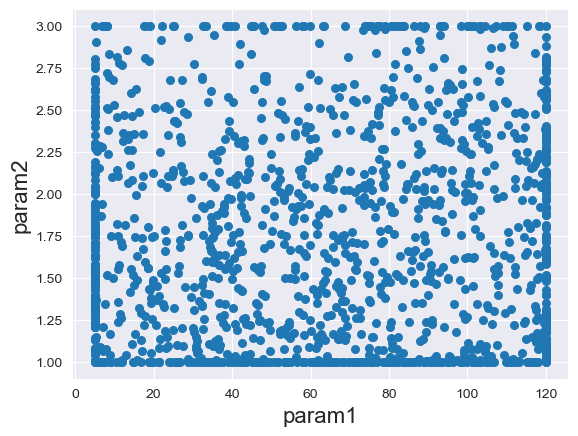

In [53]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10,n_estimators =5)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)
print("recall=",recall_score(y_test,y_pred))


accuracy= 79.87012987012987
recall= 0.6170212765957447


In [55]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 80, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [56]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([36.16089749, 10.        , 83.76623377]),
 [array([49.82765043,  6.99619158, 75.32467532]),
  array([84.23745844,  5.0166059 , 74.67532468]),
  array([ 2.        ,  9.20152133, 75.97402597]),
  array([22.99521213, 10.        , 77.27272727]),
  array([81.25114862,  2.        , 72.72727273]),
  array([ 2.        ,  5.28465888, 71.42857143]),
  array([ 2.        ,  4.30689048, 79.22077922]),
  array([56.85775062,  8.51005561, 76.62337662]),
  array([98.6741552 ,  3.75516569, 72.72727273]),
  array([37.53078754,  3.78507899, 73.37662338]),
  array([ 5.99906903,  5.07328515, 77.92207792]),
  array([ 6.70204603,  5.28783755, 79.87012987]),
  array([14.92555573,  2.6285781 , 70.12987013]),
  array([ 5.38093031,  3.82473047, 75.32467532]),
  array([28.37518197,  9.39785895, 76.62337662]),
  array([46.65212422,  7.37629398, 77.27272727]),
  array([43.52974755, 10.        , 77.92207792]),
  array([82.19362674,  6.85849468, 76.62337662]),
  array([ 8.14639922,  2.72572918, 77.92207792]),
 

In [57]:
#best position
resultat_RF[0]

array([36.16089749, 10.        , 83.76623377])

In [59]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

83.76623376623377

In [60]:
ds=pd.DataFrame(data=resultat_RF[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()

  
fig = px.scatter_3d(ds, x = 0, 
                    y = 1, z = 2)
  
fig.show()

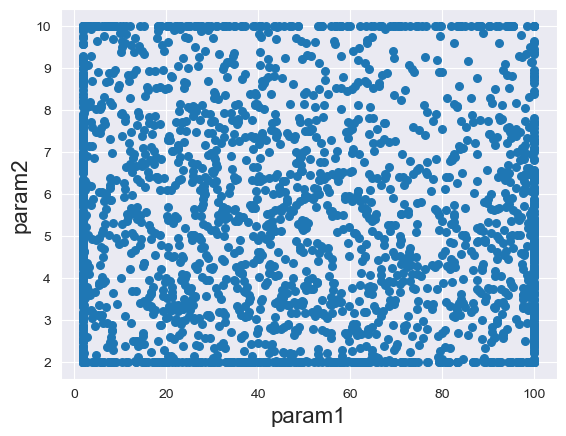

In [61]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Logistic Regression

In [62]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [63]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_RL_without = accuracy_score(y_test,y_pred)*100
accuracy_RL_without

79.87012987012987

In [64]:
#CSA
def fitness(variables_values = [1.0,0]):
    classifier = LogisticRegression(C=variables_values[0],random_state=ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 5, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.7, fL =5, min_values = [0.1,0], max_values = [1000.0,100], iterations = 20, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [65]:
resultat_RL=crow_search_algorithm()
resultat_RL

(array([566.66036496,  20.        ,  84.41558442]),
 [array([917.40784514,  36.63628317,  80.51948052]),
  array([369.39700345,  47.90576198,  80.51948052]),
  array([126.30935901,  23.93472713,  80.51948052]),
  array([323.82645475,  97.80280881,  80.51948052]),
  array([166.86768424,  55.42793965,  80.51948052]),
  array([652.98409056,  63.52365957,  79.22077922]),
  array([806.87805988,  57.56828769,  80.51948052]),
  array([476.80122474,   0.        ,  79.87012987]),
  array([173.91433212,  77.89836843,  80.51948052]),
  array([1000.        ,  100.        ,   79.87012987]),
  array([902.91967303,  42.20754535,  78.57142857]),
  array([937.13269734,  94.1340212 ,  79.87012987]),
  array([158.32201577,  53.12659925,  80.51948052]),
  array([119.06040899,  25.71769676,  80.51948052]),
  array([610.43477867,  65.90012043,  80.51948052]),
  array([757.58586118,  32.41013374,  80.51948052]),
  array([66.99902817, 42.72368806, 81.16883117]),
  array([573.6707331 ,  28.56072601,  82.467532

In [66]:
resultat_RL[0]

array([566.66036496,  20.        ,  84.41558442])

In [67]:
accuracy_RL_withCSA=resultat_RL[0][2]
accuracy_RL_withCSA

84.4155844155844

In [68]:
ds=pd.DataFrame(data=resultat_RL[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0,y = 1, z = 2)
fig.show()

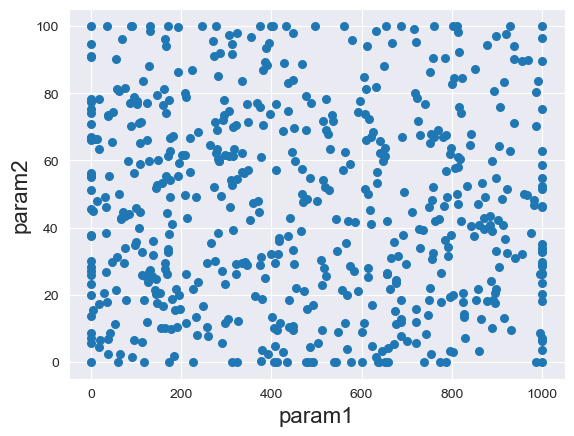

In [69]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Evaluation 

In [70]:
y1 = [accuracy_KNN_without, accuracy_RF_without, accuracy_RL_without] 
y2 = [accuracy_KNN_withCSA, accuracy_RF_withCSA, accuracy_RL_withCSA]

<AxesSubplot:xlabel='0', ylabel='1'>

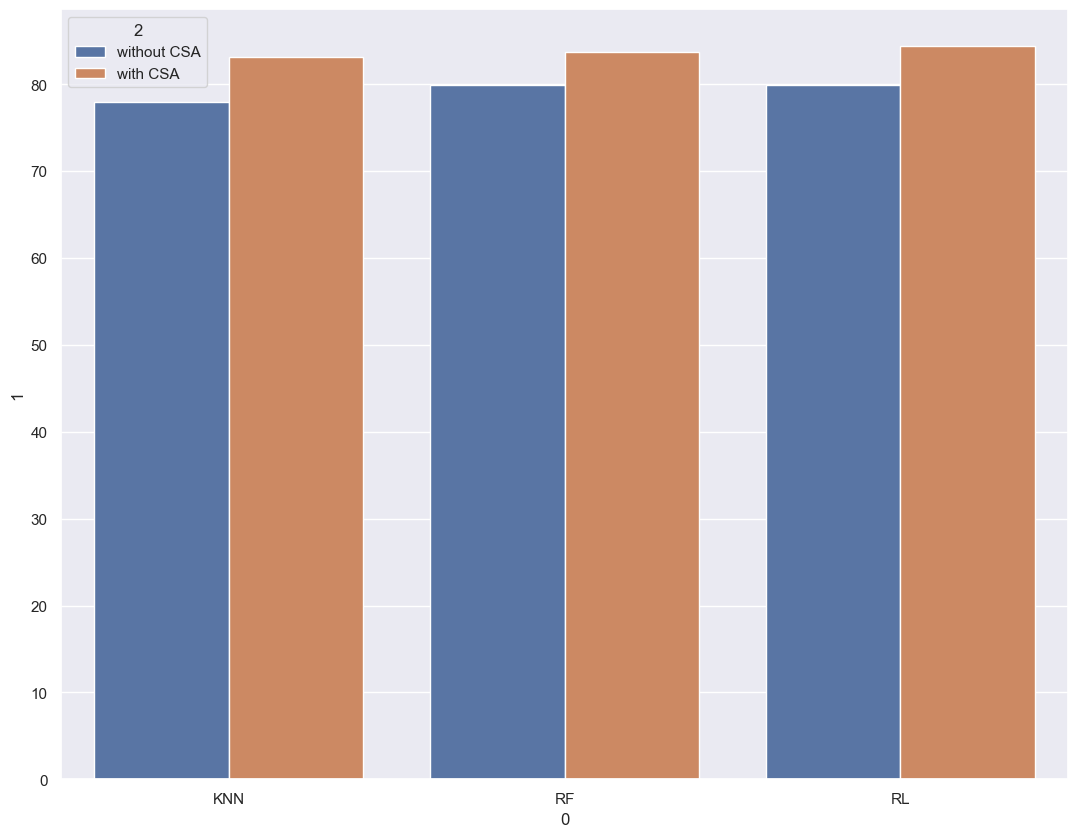

In [71]:
ds=[['KNN',y1[0],'without CSA'],['KNN',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['RL',y1[2],'without CSA'],['RL',y2[2],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(13,10)})
sns.barplot(data=ds, x=0, y=1, hue=2)